<a href="https://colab.research.google.com/github/srividyavedantam/first/blob/master/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To predict diabetes using PIMA diabetes data

### Importing libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [92]:
data = pd.read_csv("diabetes.csv")

In [93]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,skin,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


In [94]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [95]:
data.Outcome.value_counts()

False    500
True     268
Name: Outcome, dtype: int64

In [96]:
# check if any null value is present
data.isnull().values.any()

False

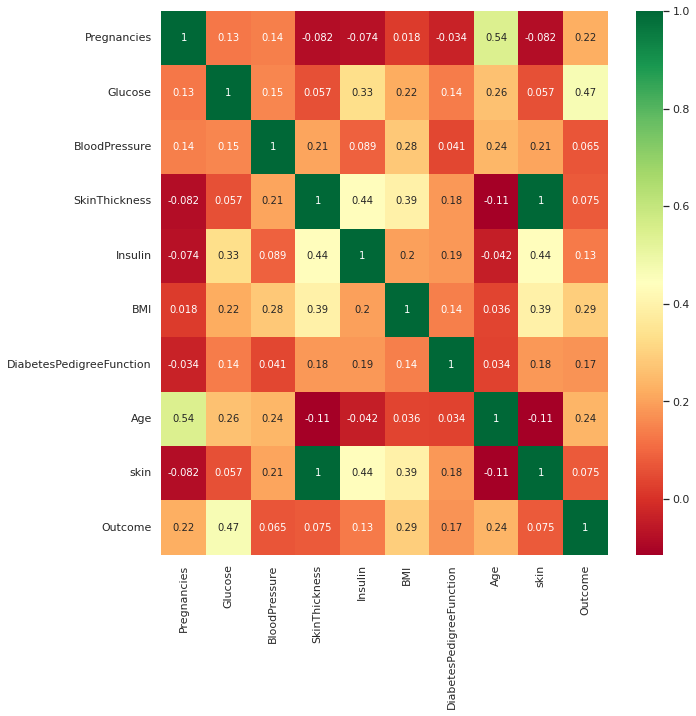

In [97]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [98]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,skin,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


## Changing the Outcome column data from boolean to number

In [99]:
Outcome_map = {True: 1, False: 0}

In [100]:
data['Outcome'] = data['Outcome'].map(Outcome_map)

In [101]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,skin,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [102]:
diabetes_true_count = len(data.loc[data['Outcome'] == True])
diabetes_false_count = len(data.loc[data['Outcome'] == False])

In [103]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

# Data Preprocessing

In [104]:
#Missing Observation Analysis
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [105]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,skin,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1.3790,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,1.1426,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,0.0000,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0.9062,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.3790,1


In [106]:
#missing values
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
skin                          0
Outcome                       0
dtype: int64

In [107]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [108]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = data.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    data.loc[(data['Outcome'] == 0 ) & (data[i].isnull()), i] = median_target(i)[i][0]
    data.loc[(data['Outcome'] == 1 ) & (data[i].isnull()), i] = median_target(i)[i][1]

In [20]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,skin,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1.3790,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,1.1426,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,0.0000,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0.9062,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.3790,1


In [109]:
# Missing values were filled.
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
skin                        0
Outcome                     0
dtype: int64

In [110]:
#Outlier Observation Analysis
for feature in data:
    
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if data[(data[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
skin yes
Outcome no


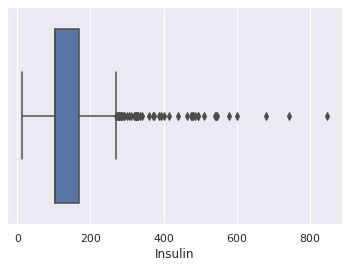

In [111]:
import seaborn as sns
sns.boxplot(x = data["Insulin"]);

In [113]:
import numpy as np
print(np.where(data['Insulin']>260))

(array([  8,  13,  53,  54,  56,  73, 111, 139, 144, 153, 162, 186, 199,
       206, 215, 220, 228, 231, 247, 248, 258, 279, 286, 296, 360, 364,
       370, 375, 388, 392, 395, 409, 412, 415, 425, 480, 486, 487, 519,
       561, 574, 584, 606, 608, 612, 645, 655, 679, 695, 707, 710, 713,
       715, 753]),)


In [114]:
# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(data)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [115]:
data_scores = lof.negative_outlier_factor_
np.sort(data_scores)[0:30]

array([-3.3043866 , -3.06019023, -2.48878327, -2.37056734, -2.15290288,
       -2.09517187, -2.07688011, -2.01092058, -1.95236954, -1.86254904,
       -1.73942767, -1.72640176, -1.71542115, -1.70250963, -1.66322124,
       -1.64084643, -1.63885409, -1.62527707, -1.61499859, -1.60048773,
       -1.59868548, -1.59564308, -1.56989744, -1.55802367, -1.55551358,
       -1.51714196, -1.50834022, -1.50265497, -1.5003097 , -1.49701514])

In [116]:
#We choose the threshold value according to lof scores
threshold = np.sort(data_scores)[7]
threshold

-2.010920578932166

In [28]:
data.shape

(768, 10)

# Feature Engineering

In [29]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
data["NewBMI"] = NewBMI
data.loc[data["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
data.loc[(data["BMI"] > 18.5) & (data["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
data.loc[(data["BMI"] > 24.9) & (data["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
data.loc[(data["BMI"] > 29.9) & (data["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
data.loc[(data["BMI"] > 34.9) & (data["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
data.loc[data["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,skin,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1.3790,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,1.1426,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,0.0000,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0.9062,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.3790,1,Obesity 3


In [30]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [31]:
data = data.assign(NewInsulinScore=data.apply(set_insulin, axis=1))

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,skin,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1.3790,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,1.1426,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,0.0000,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0.9062,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.3790,1,Obesity 3,Abnormal


In [32]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
data["NewGlucose"] = NewGlucose
data.loc[data["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
data.loc[(data["Glucose"] > 70) & (data["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
data.loc[(data["Glucose"] > 99) & (data["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
data.loc[data["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [55]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,skin,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1.3790,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,1.1426,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,0.0000,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0.9062,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.3790,1,Obesity 3,Abnormal,Secret


# Model Building

In [118]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=7)
                                                    

In [127]:
# Building the model using Support Vector Machine (SVM)

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)

In [128]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.8267716535433071


In [129]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[139  23]
 [ 21  71]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       162
           1       0.76      0.77      0.76        92

    accuracy                           0.83       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.83      0.83      0.83       254



In [131]:
# Building the model using DecisionTree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.8346456692913385


In [132]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[144  18]
 [ 24  68]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       162
           1       0.79      0.74      0.76        92

    accuracy                           0.83       254
   macro avg       0.82      0.81      0.82       254
weighted avg       0.83      0.83      0.83       254



In [133]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [134]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.889763779527559


In [136]:
# Building model using XGBoost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

from sklearn import metrics

xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.8622047244094488


In [137]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[150  12]
 [ 16  76]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       162
           1       0.86      0.83      0.84        92

    accuracy                           0.89       254
   macro avg       0.88      0.88      0.88       254
weighted avg       0.89      0.89      0.89       254



# Conclusion

After Build the Machine learning models Random forest is best one to accurately predict whether or not the patients in the dataset have diabetes or not 

Support vector machine Accuracy Score = 0.8267716535433071 ||
Decision Accuracy Score = 0.8346456692913385 ||
Random Forest Accuracy_Score = 0.889763779527559 ||
XG Boost Accuracy Score = 0.8622047244094488.